# PREPROCESAMIENTO DE DATOS

### Nombre de la asignatura: Minería de Datos - Laboratorio
### Carrera: Big Data
### Integrantes: Maicol Lojano - Victor Cabrera - Danny Pineda
### Fecha: 28/11/2023

### 1: Importación de librerías

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
import scrapy

### 2: Cargar los datos

In [78]:
# Paso 1: Cargar el dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv'

In [79]:
df = pd.read_csv(url)

In [80]:
print(df.head())

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-01 21:58:49   
1  22001.0     Acadia       Louisiana             US  2020-04-01 21:58:49   
2  51001.0   Accomack        Virginia             US  2020-04-01 21:58:49   
3  16001.0        Ada           Idaho             US  2020-04-01 21:58:49   
4  19001.0      Adair            Iowa             US  2020-04-01 21:58:49   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          4       0          0       4   
1  30.295065  -92.414197         47       1          0      46   
2  37.767072  -75.632346          7       0          0       7   
3  43.452658 -116.241552        195       3          0     192   
4  41.330756  -94.471059          1       0          0       1   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  


## Paso 3. Exploracion de los datos:
Para comenzar debemos ver que nomas tenemos en la data, para ver lo que podemos utilizar.

In [81]:
df.shape

(2522, 12)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2175 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2338 non-null   object 
 3   Country_Region  2522 non-null   object 
 4   Last_Update     2522 non-null   object 
 5   Lat             2518 non-null   float64
 6   Long_           2518 non-null   float64
 7   Confirmed       2522 non-null   int64  
 8   Deaths          2522 non-null   int64  
 9   Recovered       2522 non-null   int64  
 10  Active          2522 non-null   int64  
 11  Combined_Key    2522 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 236.6+ KB


In [83]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2175.000000,2518.000000,2518.000000,2522.000000,2522.000000,2522.000000,2522.000000
mean,30114.640920,35.289228,-75.615792,372.307296,20.477002,76.656622,278.524187
std,15643.080021,12.149460,47.809329,4174.952692,363.948042,1494.960160,2945.050096
min,1001.000000,-71.949900,-175.198200,0.000000,0.000000,0.000000,0.000000
25%,18052.000000,33.086811,-94.749118,2.000000,0.000000,0.000000,2.000000
50%,29031.000000,37.526763,-86.065254,7.000000,0.000000,0.000000,6.000000
75%,45024.000000,41.406878,-79.042655,34.000000,1.000000,0.000000,31.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


### Paso 4: Proceso de preprocesamiento de datos

Identificar los tipos de datos:

In [84]:
# La función dtypes genera una tabla con el tipo de dato de cada columna
df.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

#### Identificar datos faltantes

In [85]:
df.isnull().sum()

FIPS              347
Admin2            301
Province_State    184
Country_Region      0
Last_Update         0
Lat                 4
Long_               4
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

#### Observamos que la columna FIPS presenta más del 50% de datos faltantes.

In [86]:
df.columns


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

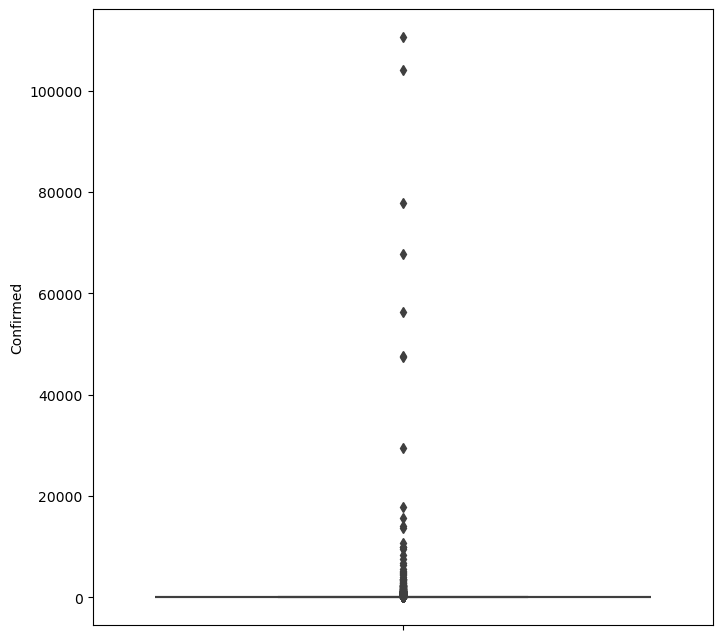

In [87]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["Confirmed"])
plt.show()

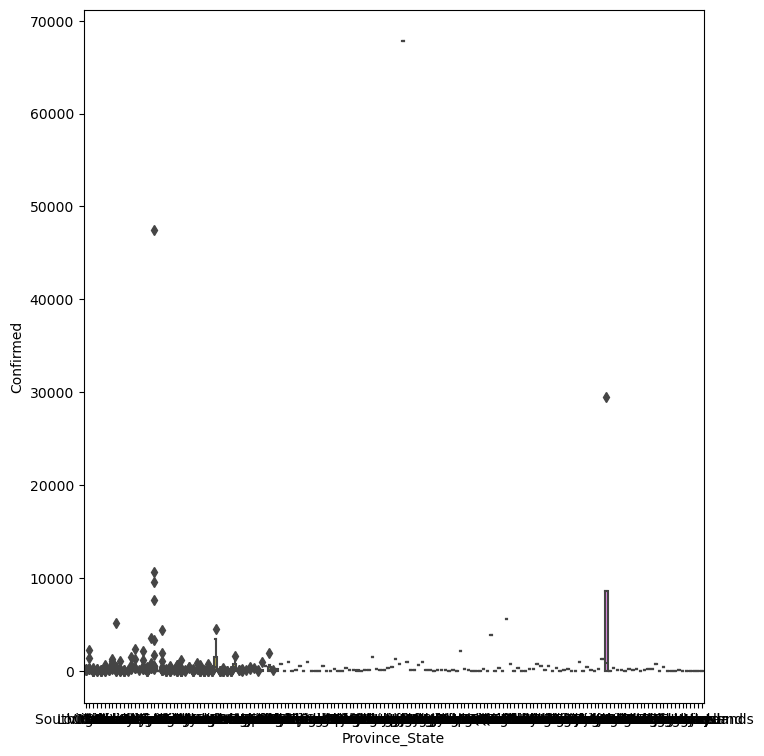

In [88]:
fig = plt.figure(figsize=(8,9))
sns.boxplot(x="Province_State", y="Confirmed", data=df)
plt.show()

####  Ahora visualizamos a las variables categóricas: agregándole include=['object'] podremos observar solo las columnas que son categóricas (de tipo object):

In [89]:
df.describe(include=['object'])

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,2221,2338,2522,2522,2522
unique,1388,162,190,35,2522
top,Unassigned,Texas,US,2020-04-01 21:58:49,"Abbeville, South Carolina, US"
freq,32,141,2228,2265,1


## Paso 8. Análisis de tendencia central, posición y dispersión: 🎯

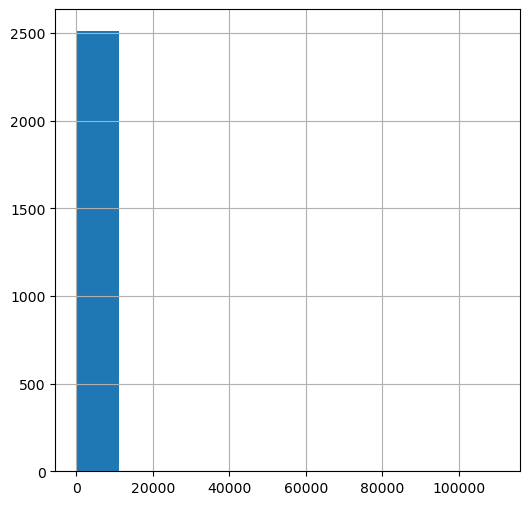

In [90]:
df['Confirmed'].hist(figsize=(6,6))
plt.show()

In [91]:
mean = df['Confirmed'].mean()
median = df['Confirmed'].median()
mode = df['Confirmed'].mode()
skew = df['Confirmed'].skew()
kurt = df['Confirmed'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)


La media es: 372.3072957969865
La mediana es: 7.0
La moda es: 0    1
Name: Confirmed, dtype: int64
El sesgo es: 19.946002128469456
La kurtosis es: 442.96873884755126


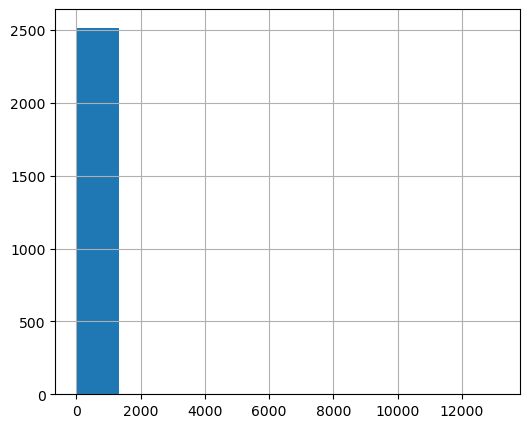

In [92]:
df['Deaths'].hist(figsize=(6, 5))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

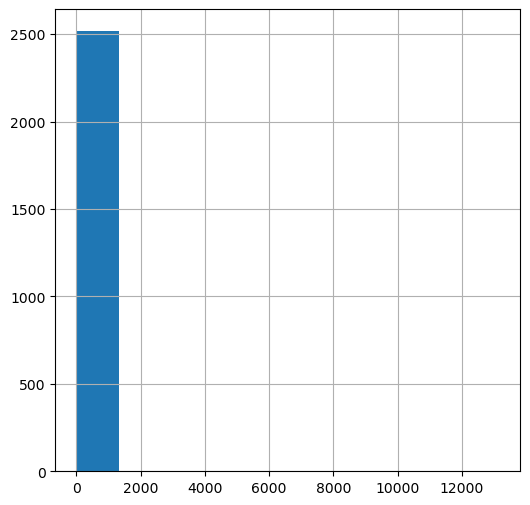

In [93]:
df['Deaths'].hist(figsize = (6,6))
plt.show

In [94]:
mean = df['Deaths'].mean()
median = df['Deaths'].median()
mode = df['Deaths'].mode()
skew = df['Deaths'].skew()
kurt = df['Deaths'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 20.477002379064235
La mediana es: 0.0
La moda es: 0    0
Name: Deaths, dtype: int64
El sesgo es: 27.946127871168613
La kurtosis es: 877.8779731251473


## Paso 6. Contando datos duplicados:


In [95]:
df.duplicated().sum()

0

Observamos que existen 0 , es decvir no hay filas con los mismos datos

## Paso 7. Análisis de variables numéricas:

array([[<Axes: title={'center': 'FIPS'}>,
        <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Long_'}>],
       [<Axes: title={'center': 'Confirmed'}>,
        <Axes: title={'center': 'Deaths'}>,
        <Axes: title={'center': 'Recovered'}>],
       [<Axes: title={'center': 'Active'}>, <Axes: >, <Axes: >]],
      dtype=object)

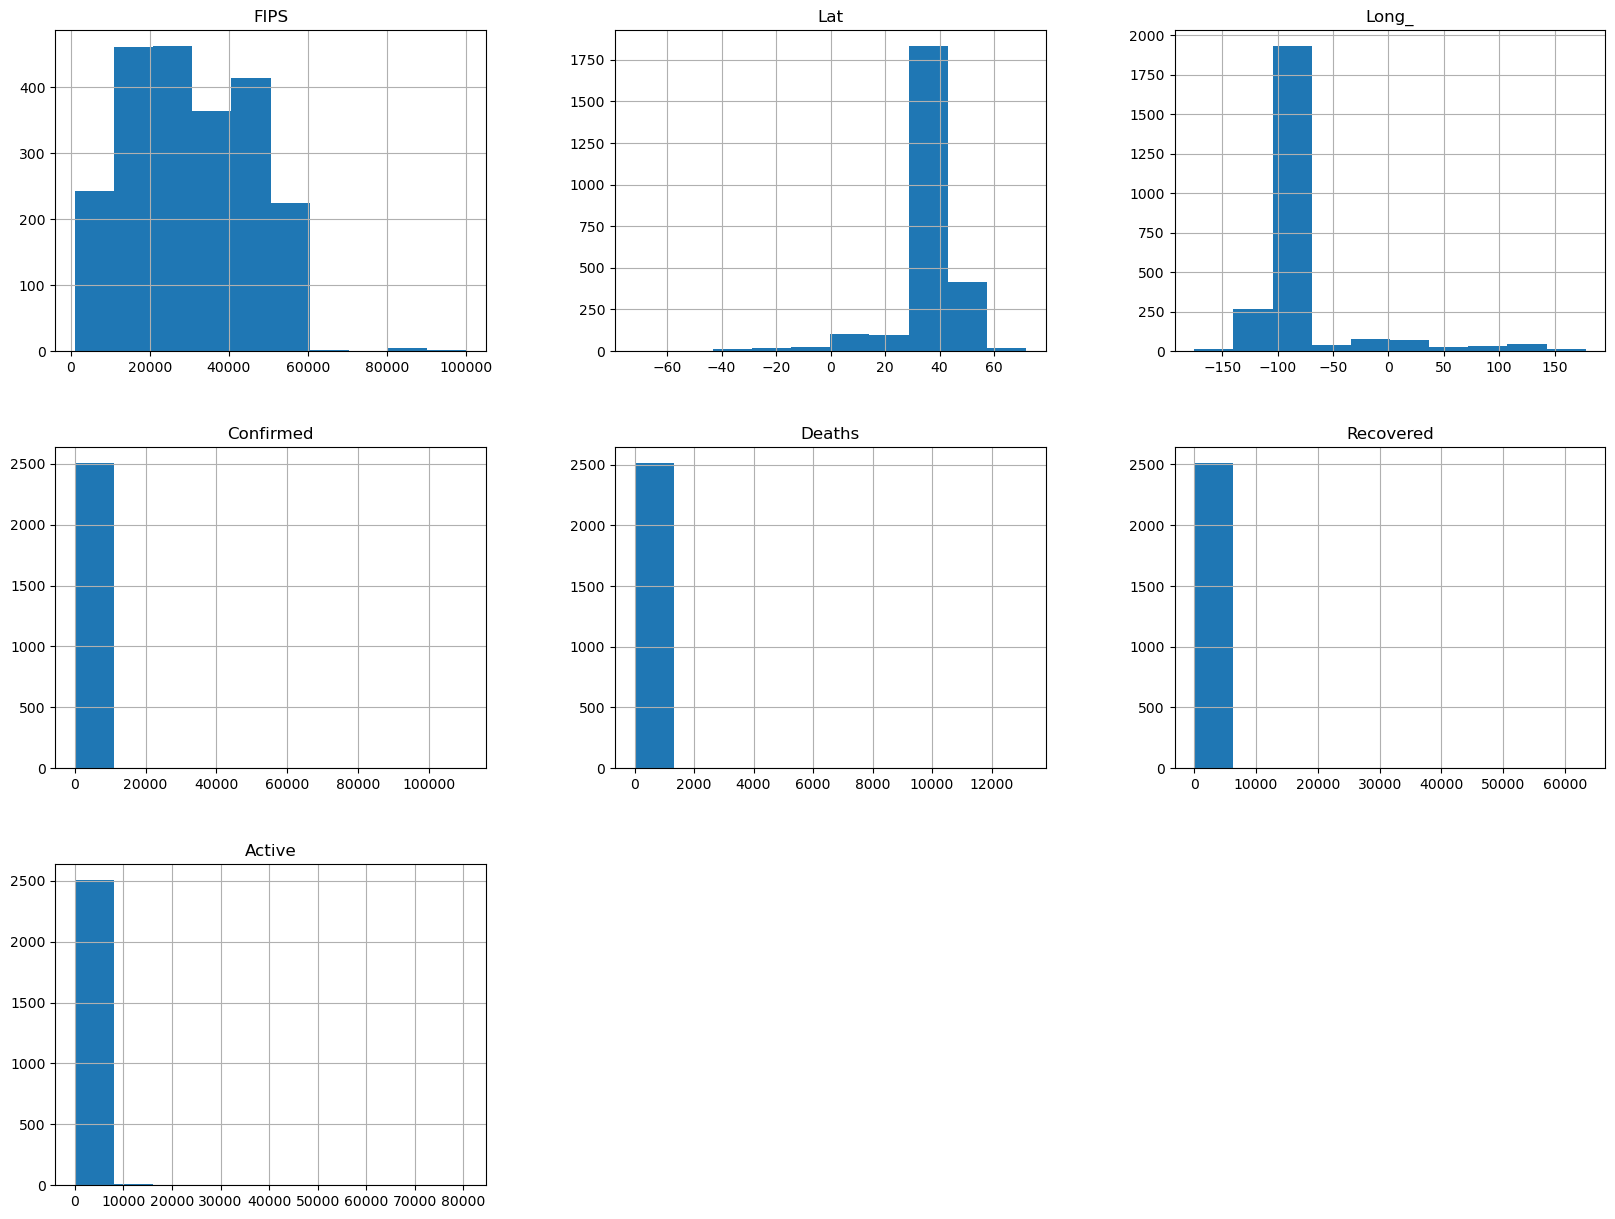

In [96]:
df.hist(figsize=(20,15))

# Para visualizar la relación entre dos variables numéricas se utiliza un gráfico de líneas. Este combina las variables de las provimncias en el  cual podemos ver casos confirmados entre provincias Province_State y los casos confirmados Confirmed.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Province_State', ylabel='Confirmed'>

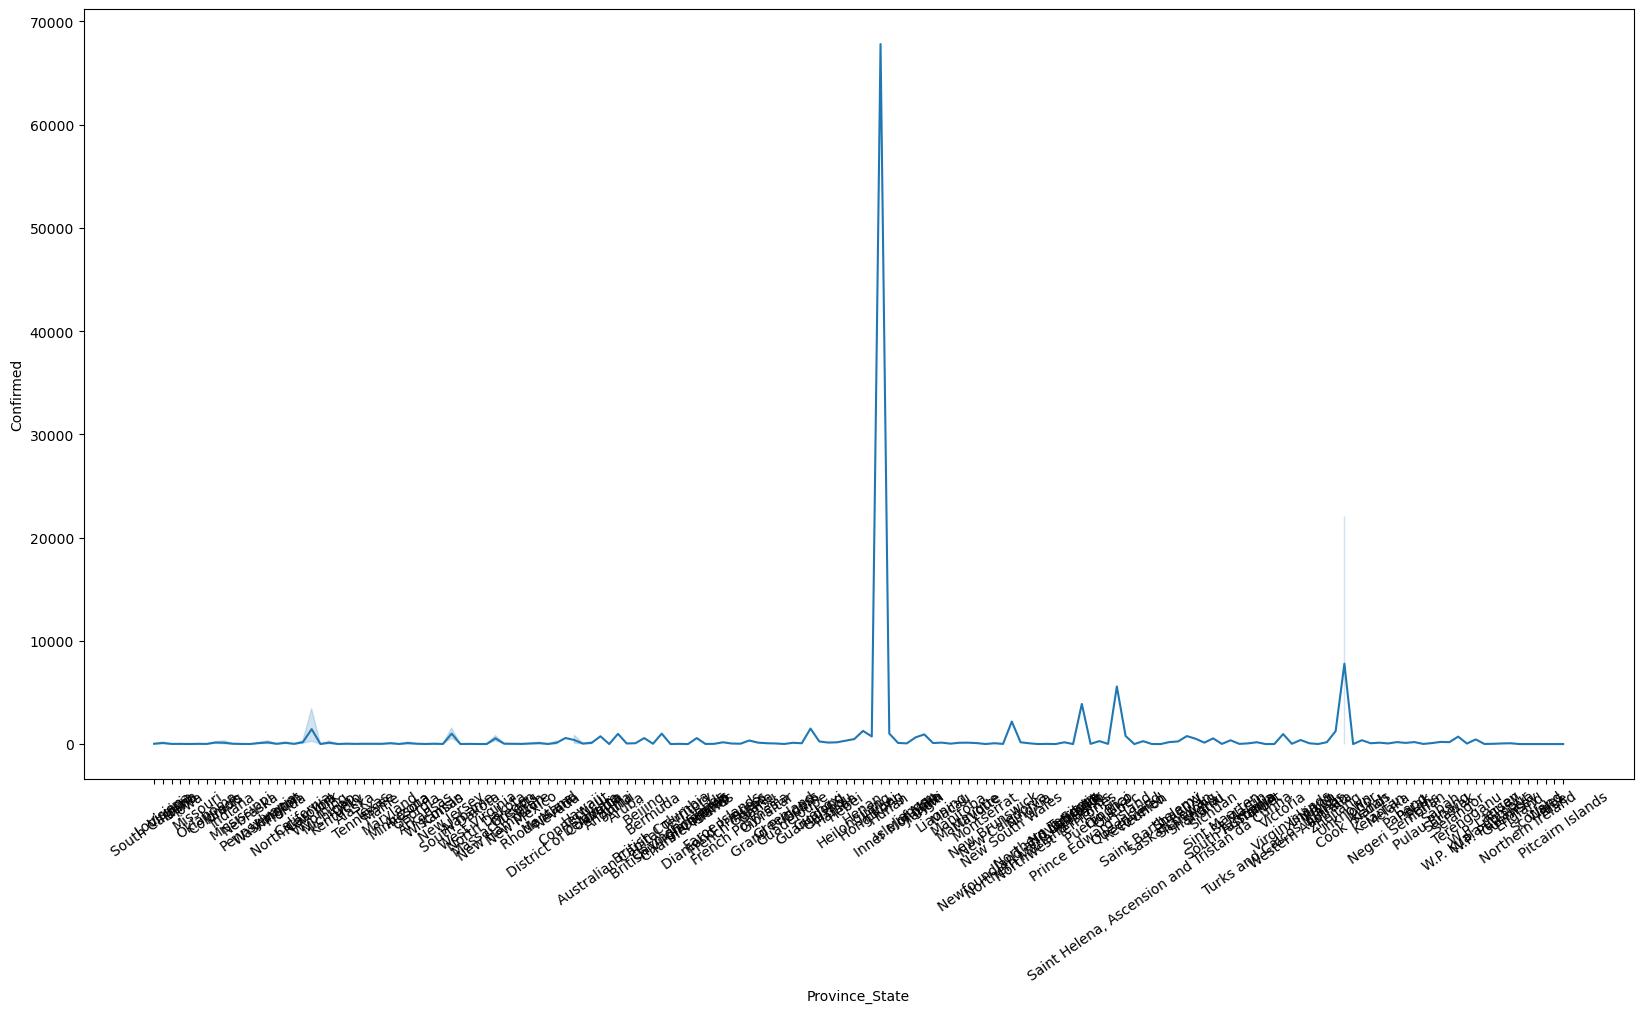

In [97]:
fig = plt.figure(figsize=(20,10), dpi=100)
plt.xticks(rotation = 35, fontsize=10)
sns.lineplot(data=df, x = 'Province_State', y = 'Confirmed')

## Ahora hacemos lo mismo, pero con el número total de muertes en cada provincia Deaths:

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Province_State', ylabel='Deaths'>

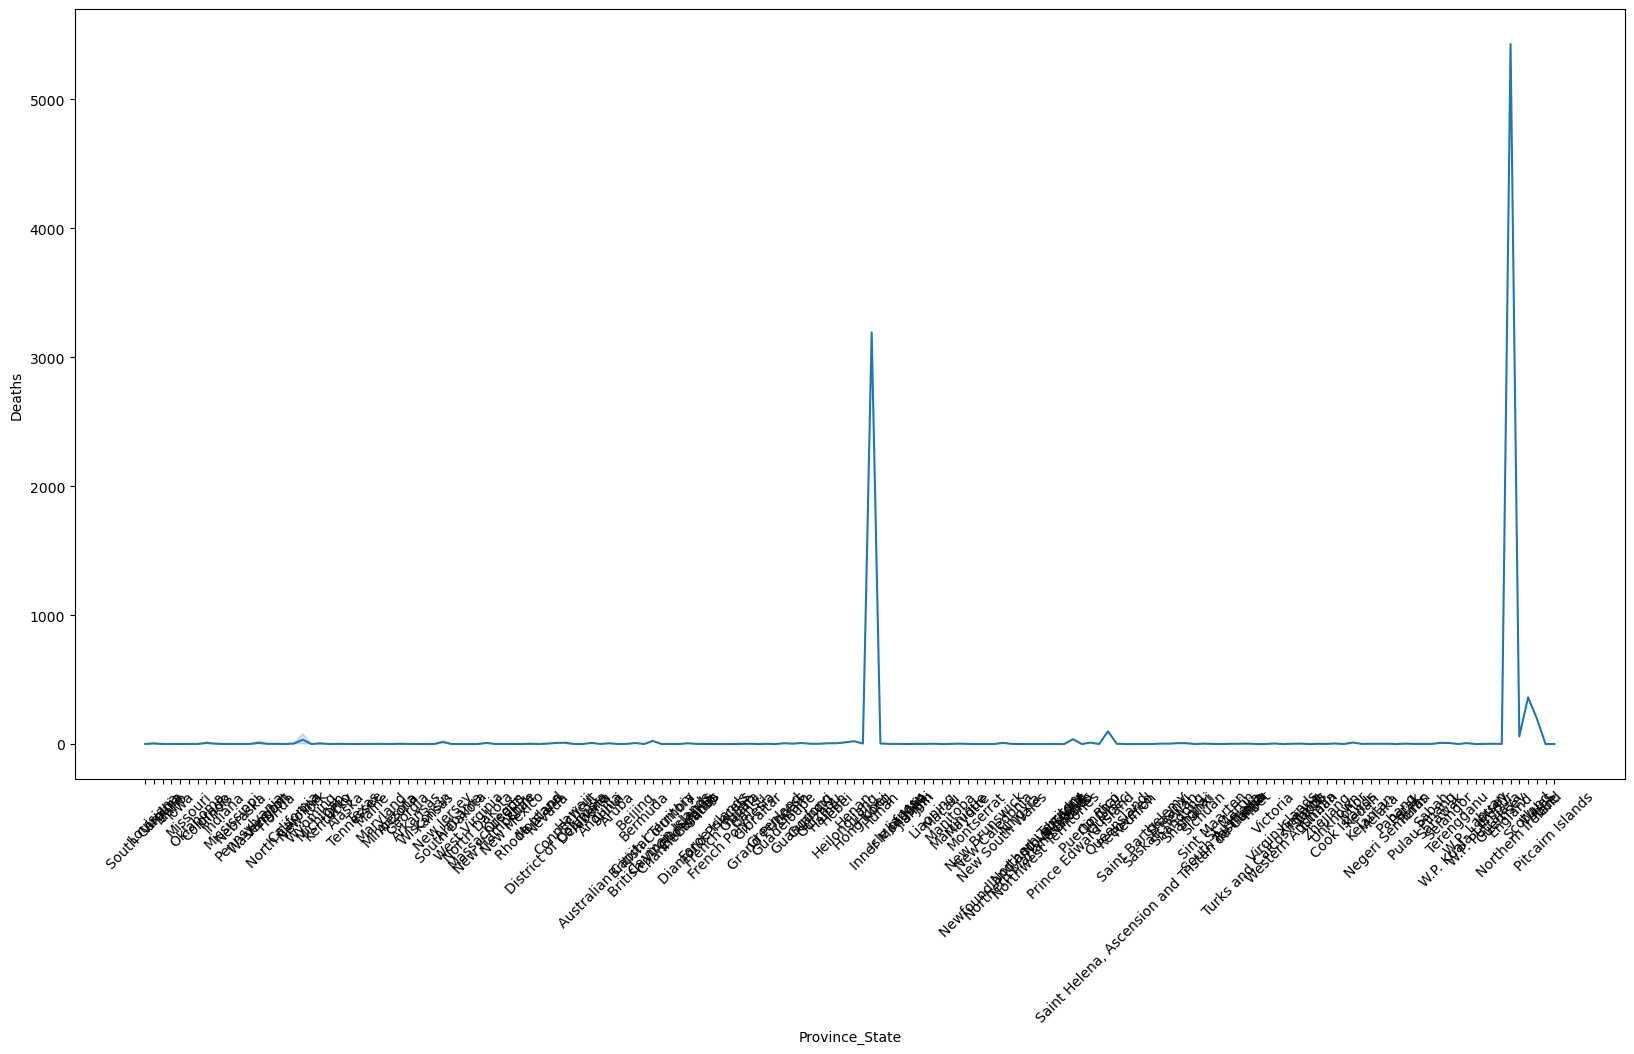

In [98]:
fig = plt.figure(figsize=(20,10), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'Province_State', y = 'Deaths')

## Paso 8: Análisis de variables categóricas:

Para analizar las variables categóricas, seleccionamos primero el subconjunto del dataframe y visualizamos los valores de cada categoría. Identificamos algún valor que no corresponda con el negocio.

Seleccionar las variables categóricas:



In [99]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,2020-04-01 21:58:49,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,2020-04-01 21:58:49,"Accomack, Virginia, US"
3,Ada,Idaho,US,2020-04-01 21:58:49,"Ada, Idaho, US"
4,Adair,Iowa,US,2020-04-01 21:58:49,"Adair, Iowa, US"


### Visualizar los valores de cada una de las variables:
Esto nos ayuda a identificar valores que no coinciden con el dominio del negocio, de ser así, lo eliminaríamos.




In [100]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

Admin2: 
['Abbeville' 'Acadia' 'Accomack' ... 'Yuba' 'Yuma' nan]

Province_State: 
['South Carolina' 'Louisiana' 'Virginia' 'Idaho' 'Iowa' 'Missouri'
 'Oklahoma' 'Colorado' 'Illinois' 'Indiana' 'Mississippi' 'Nebraska'
 'Pennsylvania' 'Washington' 'Vermont' 'Florida' 'North Carolina'
 'California' 'New York' 'Wyoming' 'Michigan' 'Kentucky' 'Ohio' 'Alaska'
 'Tennessee' 'Texas' 'Maine' 'Maryland' 'Minnesota' 'Arizona' 'Georgia'
 'Arkansas' 'Wisconsin' 'Kansas' 'New Jersey' 'South Dakota' 'Alabama'
 'West Virginia' 'North Dakota' 'Massachusetts' 'New Hampshire' 'Oregon'
 'New Mexico' 'Utah' 'Rhode Island' 'Montana' 'Nevada'
 'District of Columbia' 'Connecticut' 'Hawaii' 'Delaware' 'Alberta'
 'Anguilla' 'Anhui' 'Aruba' 'Australian Capital Territory' 'Beijing'
 'Bermuda' 'British Columbia' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Chongqing' 'Curacao' 'Diamond Princess'
 'Faroe Islands' 'French Guiana' 'French Polynesia' 'Fujian' 'Gansu'
 'Gibraltar' 'Grand Princess' 'Gr

In [101]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [102]:
# Gráfico que muestra a la variable si los casos de covid fueron o no confirmadas.


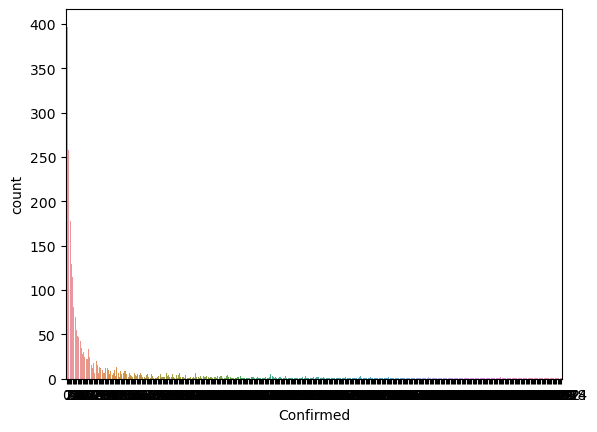

In [103]:
sns.countplot(data=df, x = 'Confirmed')
plt.show()

In [104]:
# Gráfico que muestra a la variable cuantas muertes de de covid fueron reportadas..

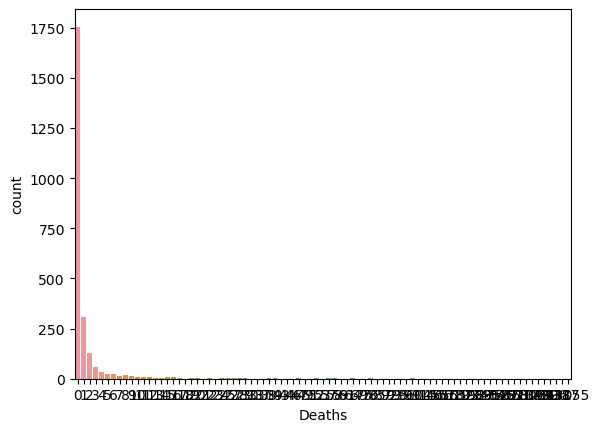

In [105]:
sns.countplot(data=df, x = 'Deaths')
plt.show()

## Paso 9: Combinando variables:

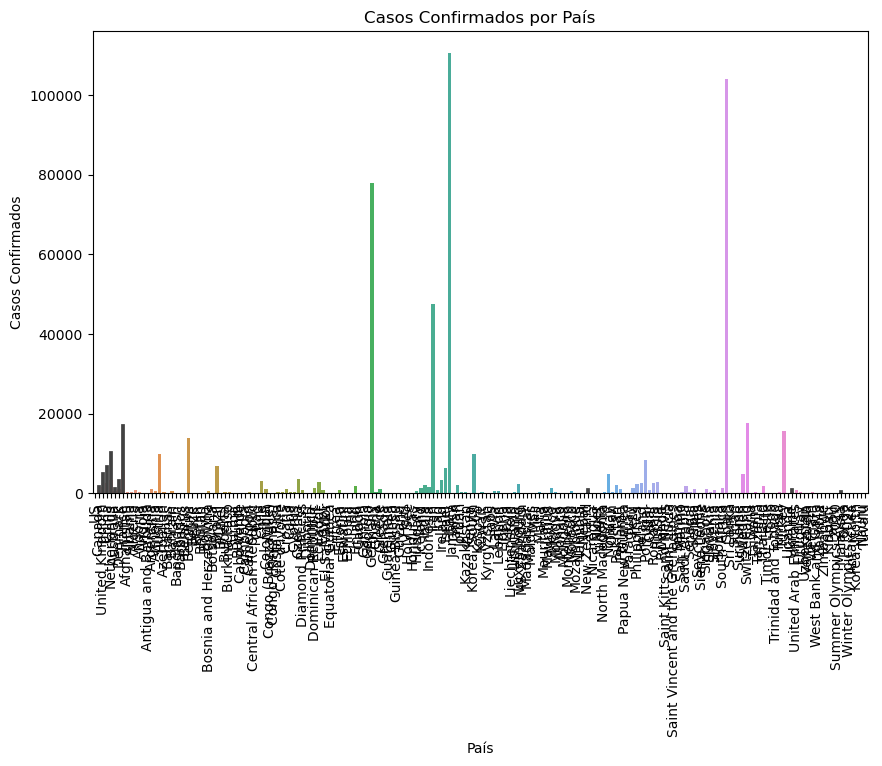

El país con el mayor número de casos confirmados es: Italy


In [106]:
# Obtener el país con el mayor número de casos confirmados

pais_mayor_confirmados = df.loc[df['Confirmed'].idxmax(), 'Country_Region']

# Crear un gráfico de barras para mostrar los casos confirmados por país
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Country_Region', y='Confirmed')
plt.xlabel('País')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados por País')
plt.xticks(rotation=90)
plt.show()

print("El país con el mayor número de casos confirmados es:", pais_mayor_confirmados)


In [107]:
column_names = df.columns.tolist()
column_names

['FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key']

In [172]:
#Separamos los grupos por tipo de hotel y solo con reservas no canceladas:
rh = pd.DataFrame(df.loc[(df['Confirmed'] == 'Confirmado') & (df['Deaths'] == 0)])
ch = pd.DataFrame(df.loc[(df['Confirmed'] == 'No Confirmado') & (df['Deaths'] == 0)])

## Paso 13. Limpieza de datos:

In [108]:
# Resolver problema de datos faltantes, observemos qué variables tienen datos faltantes y qué se puede hacer en cada caso:

In [109]:
print(df.isnull().sum())

FIPS              347
Admin2            301
Province_State    184
Country_Region      0
Last_Update         0
Lat                 4
Long_               4
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


In [110]:
df[["FIPS", "Admin2", "Province_State", "Lat", "Long_"]].describe(include="all")

,FIPS,Admin2,Province_State,Lat,Long_
count,2175.000000,2221,2338,2518.000000,2518.000000
unique,NaN,1388,162,NaN,NaN
top,NaN,Unassigned,Texas,NaN,NaN
freq,NaN,32,141,NaN,NaN
mean,30114.640920,NaN,NaN,35.289228,-75.615792
std,15643.080021,NaN,NaN,12.149460,47.809329
min,1001.000000,NaN,NaN,-71.949900,-175.198200
25%,18052.000000,NaN,NaN,33.086811,-94.749118
50%,29031.000000,NaN,NaN,37.526763,-86.065254
75%,45024.000000,NaN,NaN,41.406878,-79.042655


In [ ]:
# Reemplazo de valores NaN

In [111]:
df['FIPS'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2996105421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FIPS'].fillna(0, inplace=True)


In [112]:
df['Admin2'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\385312282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Admin2'].fillna(0, inplace=True)


In [113]:
df['Lat'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2635208989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lat'].fillna(0, inplace=True)


In [114]:
df['Long_'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2459576886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Long_'].fillna(0, inplace=True)


In [115]:
df['Province_State'].fillna('N/A', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2921055664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province_State'].fillna('N/A', inplace=True)


In [116]:
print(df.isnull().sum())

FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Combined_Key      0
dtype: int64


In [118]:
import seaborn as sns

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


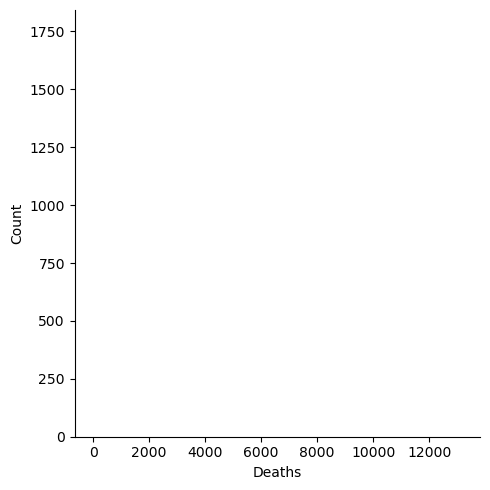

In [119]:
sns.displot(df["Deaths"])

In [120]:
mean = df['Deaths'].mean()
median = df['Deaths'].median()
mode = df['Deaths'].mode()
skew = df['Deaths'].skew()
kurt = df['Deaths'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 20.477002379064235
La mediana es: 0.0
La moda es: 0    0
Name: Deaths, dtype: int64
El sesgo es: 27.946127871168613
La kurtosis es: 877.8779731251473


## Paso 13. Tipos de datos:

In [ ]:
# Cambiar tipo de datos
df[["children"]] = df[["children"]].astype("int")

In [128]:
df.dtypes



FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

## Paso 14. Datos inconsistentes:

In [123]:
filter = (df.Province_State == 0) & (df.Country_Region == 0) & (df.Last_Update == 0)
sum(filter)

0

In [124]:
df = df[~filter]
df.shape

(2522, 12)

In [125]:
#Total de huéspedes:
df['Total_Guests'] = df['Province_State'] + df['Country_Region']

#Comprobamos que efectivamente no hay ningún registro que sume 0:
filter = df.Total_Guests != 0
df.drop("Total_Guests", axis=1, inplace=True)
sum(filter)


2522

In [127]:
#Eliminamos la columna porque solo era para probar El número de registros total son 2522, asi que es correcto
# df.drop("Total_Guests", axis=1, inplace=True)

## Paso 15. Datos atípicos:

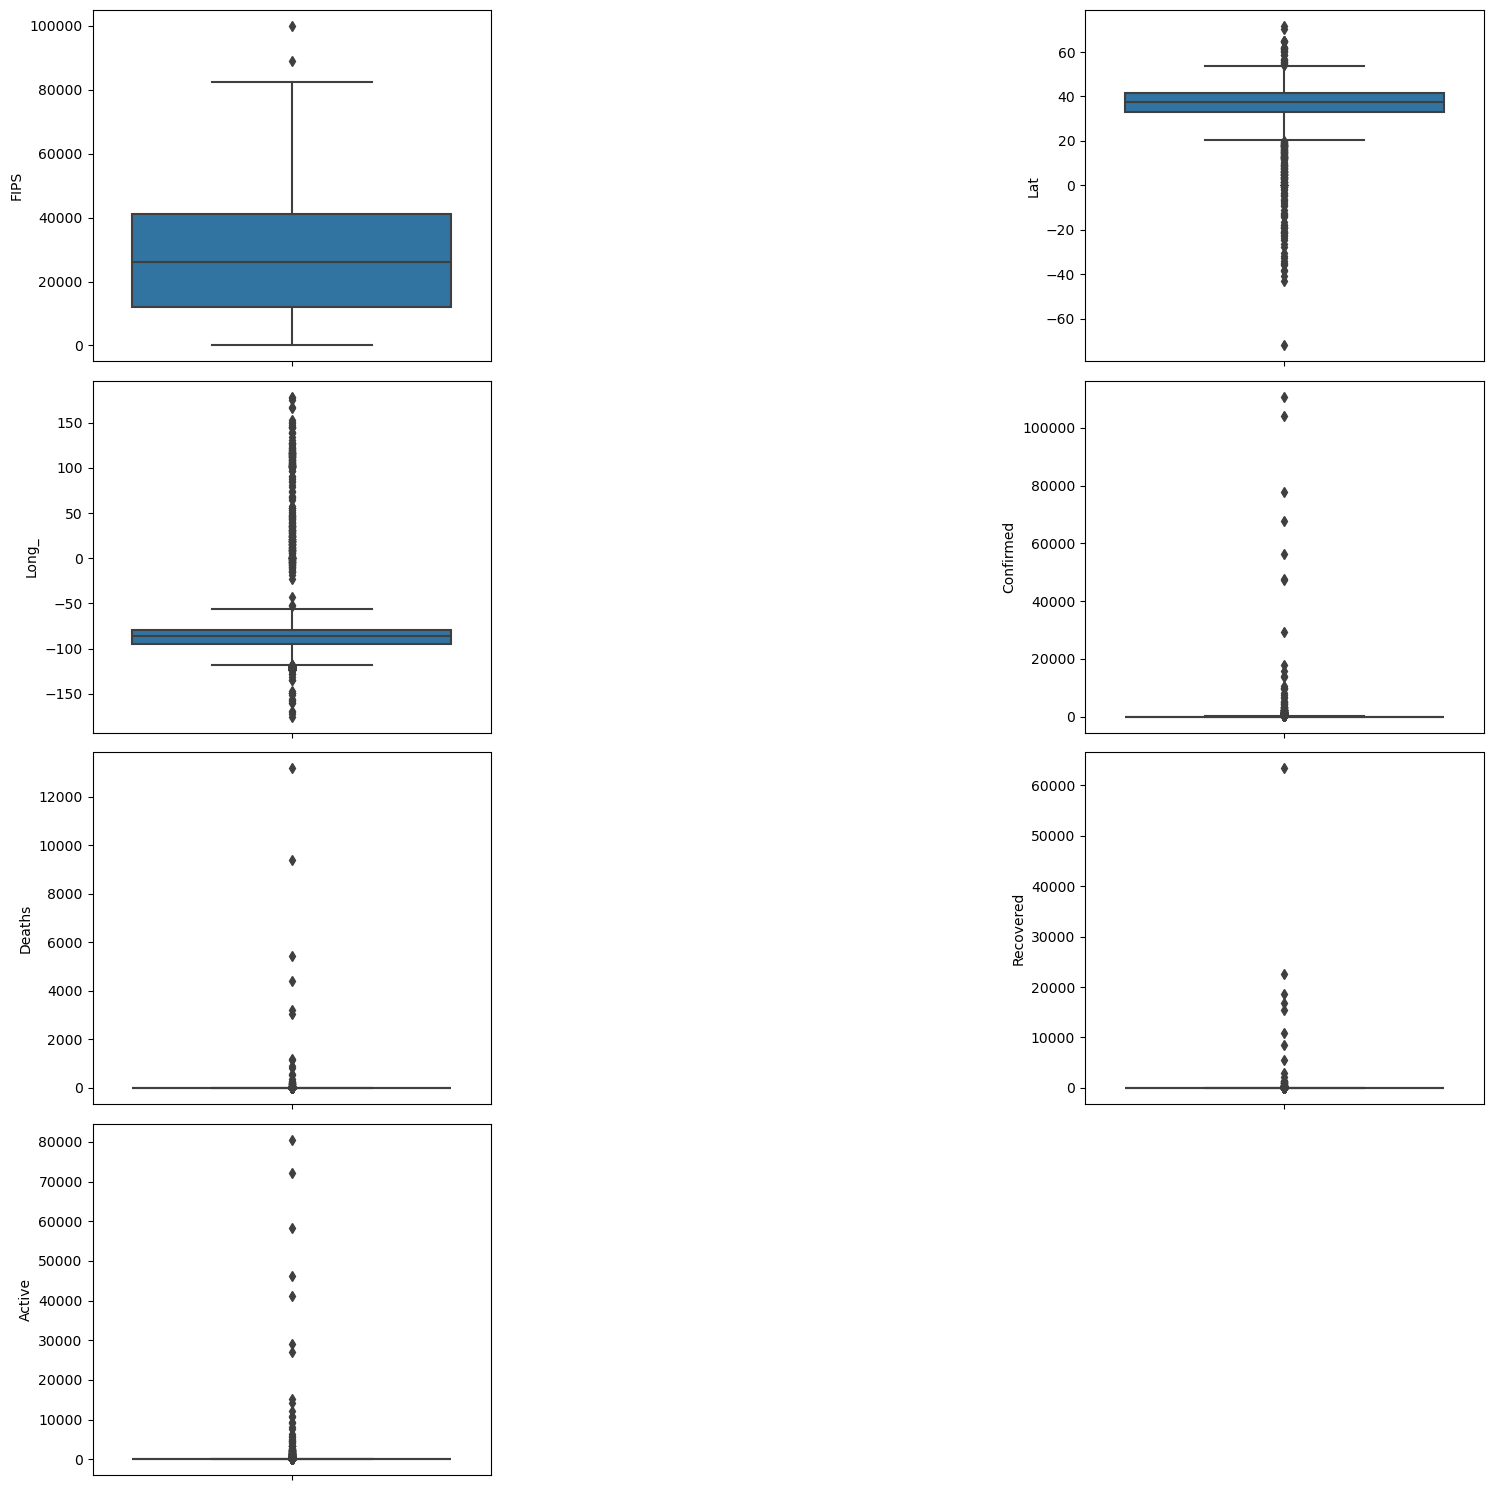

In [132]:
columnas = ['FIPS', 'Lat', 'Long_',
            'Confirmed', 'Deaths', 'Recovered', 'Active']
n = 1
plt.figure(figsize = (20, 15))

for column in columnas:
  plt.subplot(4, 4, n)
  n = n + 2
  sns.boxplot (y=df[column])
  plt.tight_layout()

In [135]:
df.loc[df.FIPS > 400, 'FIPS'] = 400
df.loc[df.Lat >= 5, 'Lat'] = 5
df.loc[df.Long_ > 20, 'Long_'] = 20
df.loc[df.Confirmed > 10, 'Confirmed'] = 10
df.loc[df.Deaths > 8, 'Deaths'] = 0
df.loc[df.Recovered > 5, 'Recovered'] = 0
df.loc[df.Active > 1000, 'Active'] = 1000

<Axes: ylabel='Frequency'>

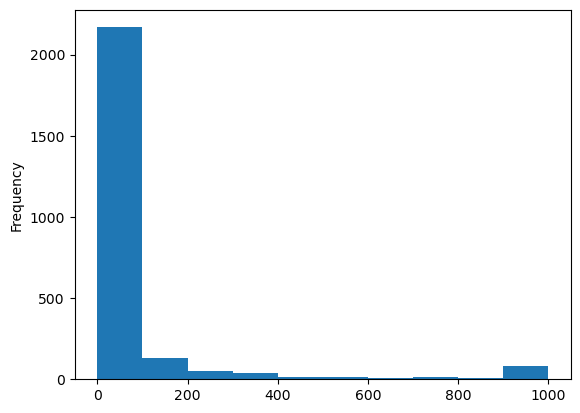

In [138]:
df['Active'].plot(kind = 'hist')

In [141]:
from sklearn.neighbors import LocalOutlierFactor

In [142]:
#Seleccionar columnas:
select_df = df[['FIPS', 'Lat', 'Long_',
            'Confirmed', 'Deaths', 'Recovered', 'Active']]

#Especificar el modelo que se va a utilizar:
model = LocalOutlierFactor(n_neighbors = 30)

#Ajuste al modelo:
y_pred = model.fit_predict(select_df)
y_pred

array([ 1,  1,  1, ..., -1,  1, -1])

In [143]:
#Filtrar los indices de los outliers
outlier_index = (y_pred == - 1) #los valores negativos son outliers

#Filtrar los valores de los outliers en el dataframe
outlier_values = select_df.iloc[outlier_index]
outlier_values

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
42,400.0,5.0000,-149.142699,10,1,0,64
43,400.0,5.0000,-84.991717,2,1,0,1
106,400.0,5.0000,-97.312064,2,0,0,8
175,400.0,5.0000,-84.218279,2,1,0,1
176,400.0,5.0000,-94.418341,1,1,0,8
...,...,...,...,...,...,...,...
2515,400.0,5.0000,-6.492300,0,0,0,0
2516,400.0,5.0000,-4.202600,0,0,0,0
2517,400.0,5.0000,-3.783700,0,0,0,0
2519,0.0,-19.0544,-169.867200,0,0,0,0


## Paso 16. Datos redundantes:

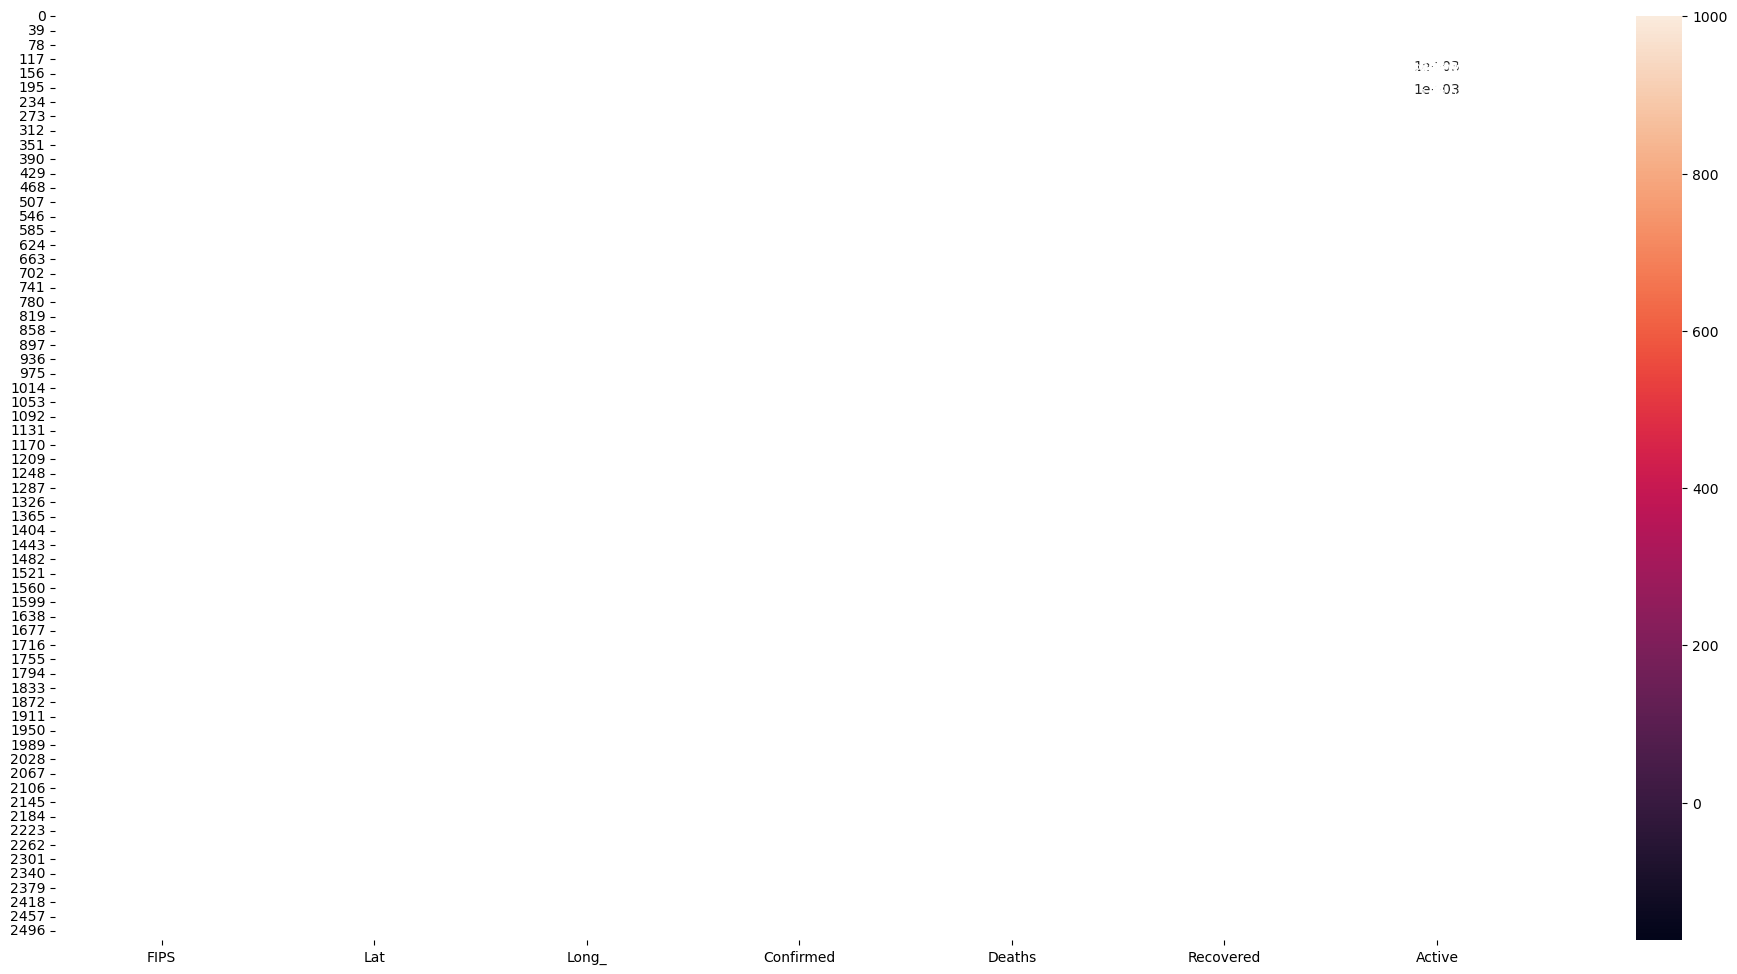

In [144]:
plt.figure(figsize = (24, 12))
corr = df.select_dtypes(include=[float, int])
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

## 17. Datos duplicados:


In [145]:
#Contando los duplicados de todo el dataframe:
df.duplicated().sum()

0

In [146]:
#Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key


In [147]:
#Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

(2522, 12)

## 17.1. Normalización:

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
df_normalize = df.copy()

In [153]:
scaler = MinMaxScaler()
df_normalize[['FIPS', 'Lat', 'Long_',
            'Confirmed', 'Deaths', 'Recovered', 'Active']] = scaler.fit_transform(df_normalize[['FIPS', 'Lat', 'Long_',
            'Confirmed', 'Deaths', 'Recovered', 'Active']])

df_normalize[['FIPS', 'Lat', 'Long_',
            'Confirmed', 'Deaths', 'Recovered', 'Active']].tail(10)

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
2512,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0
2513,0.0,0.935023,0.897540,0.0,0.0,0.0,0.0
2514,1.0,1.000000,0.891524,0.0,0.0,0.0,0.0
2515,1.0,1.000000,0.864280,0.0,0.0,0.0,0.0
2516,1.0,1.000000,0.876010,0.0,0.0,0.0,0.0
2517,1.0,1.000000,0.878156,0.0,0.0,0.0,0.0
2518,0.0,0.928229,1.000000,0.0,0.0,0.0,0.0
2519,0.0,0.687402,0.027311,0.0,0.0,0.0,0.0
2520,0.0,0.842631,1.000000,0.0,0.0,0.0,0.0
2521,0.0,0.618235,0.240135,0.0,0.0,0.0,0.0


## 17.2. Discretización:


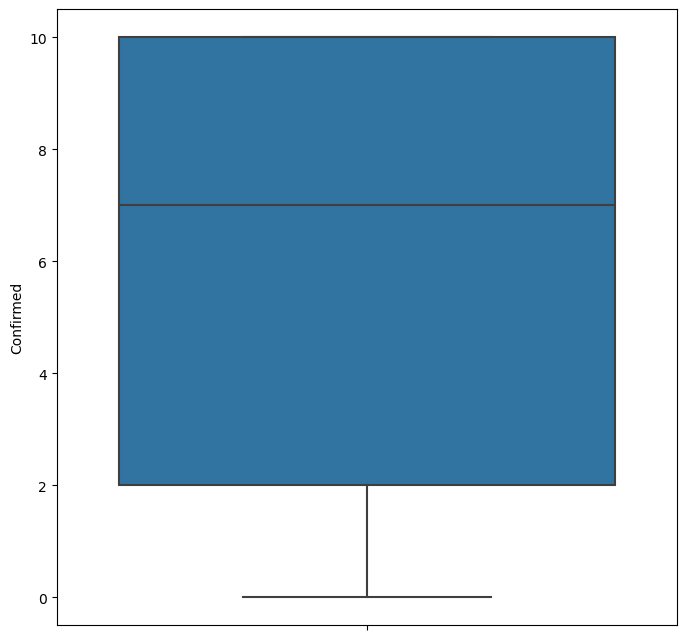

In [161]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["Confirmed"])
plt.show()

In [158]:
nivelAntelacion = ['Ninguno', '2-3Semanas', '1Mes', '2Meses', '3Meses', 'Mas3Meses']

In [159]:
df['Confirmed_binned'] = pd.cut(x = df['Confirmed'],
                      bins = [0, 1, 21, 30, 60, 120, 737],
                      labels = nivelAntelacion, include_lowest = True)
df[['Confirmed', 'Confirmed_binned']].head(10)

,Confirmed,Confirmed_binned
0,4,2-3Semanas
1,10,2-3Semanas
2,7,2-3Semanas
3,10,2-3Semanas
4,1,Ninguno
5,3,2-3Semanas
6,8,2-3Semanas
7,10,2-3Semanas
8,2,2-3Semanas
9,1,Ninguno


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


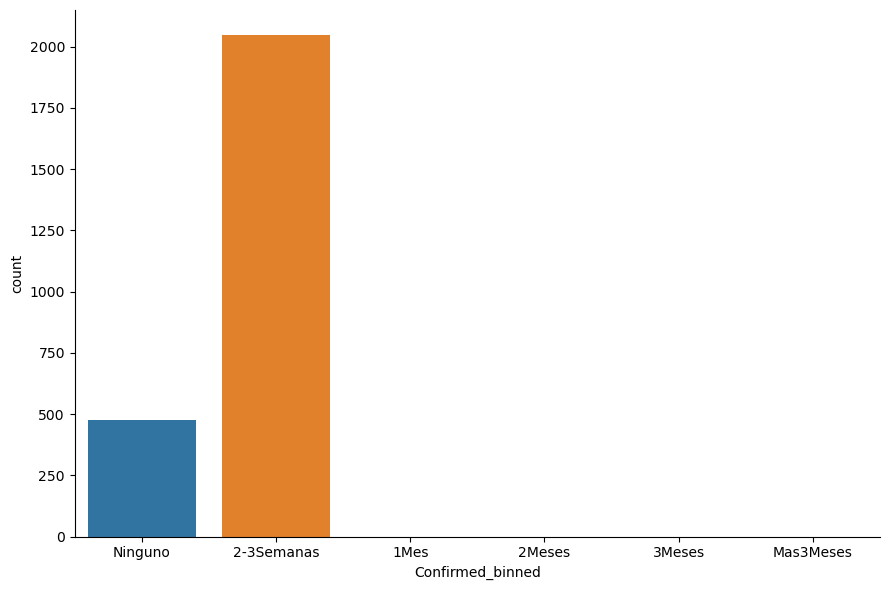

In [162]:
sns.catplot(x="Confirmed_binned", kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

## Paso 20. Numerización:


In [165]:
# Numerizar 1 a 1
df_cat['Province_State'] = df_cat['Province_State'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['Country_Region'] = df_cat['Country_Region'].map({'A': 0, 'B': 1,
                        'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8})
df_cat.head()

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
0,Abbeville,NaN,NaN,2020-04-01 21:58:49,"Abbeville, South Carolina, US"
1,Acadia,NaN,NaN,2020-04-01 21:58:49,"Acadia, Louisiana, US"
2,Accomack,NaN,NaN,2020-04-01 21:58:49,"Accomack, Virginia, US"
3,Ada,NaN,NaN,2020-04-01 21:58:49,"Ada, Idaho, US"
4,Adair,NaN,NaN,2020-04-01 21:58:49,"Adair, Iowa, US"


In [130]:
column_names = df.columns.tolist()

column_names

['FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key']

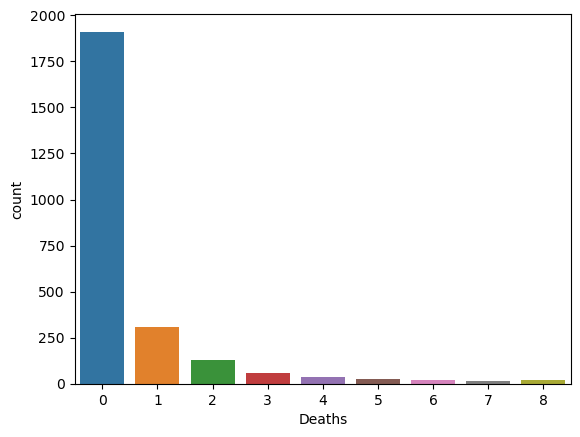

In [173]:
#Variable sі la reserva fue cancelada o no
sns.countplot(data=df, x = 'Deaths')
plt.show()

In [176]:
confirmed_counts = df["Confirmed"].value_counts()
print(confirmed_counts)

Confirmed
10    1113
1      397
2      258
3      178
4      129
5      115
6       81
0       78
7       70
8       55
9       48
Name: count, dtype: int64


In [177]:
# Contar las clases
count_class_No = (df["Confirmed"] == 0).sum()
count_class_Yes = (df["Confirmed"] != 0).sum()

print(f"Número de filas con Confirmed = 0: {count_class_No}")
print(f"Número de filas con Confirmed != 0: {count_class_Yes}")

# Dividir los DataFrames por las clases
df_class_No = df[df["Confirmed"] == 0]
df_class_Yes = df[df["Confirmed"] != 0]

print("DataFrame con Confirmed = 0:")
print(df_class_No.head())
print("DataFrame con Confirmed != 0:")
print(df_class_Yes.head())

Número de filas con Confirmed = 0: 78
Número de filas con Confirmed != 0: 2444
DataFrame con Confirmed = 0:
      FIPS    Admin2 Province_State Country_Region          Last_Update  Lat  \
58   400.0   Aransas          Texas             US  2020-04-01 21:58:49  5.0   
154  400.0    Blanco          Texas             US  2020-04-01 21:58:49  5.0   
225  400.0  Burleson          Texas             US  2020-04-01 21:58:49  5.0   
236  400.0     Butte   South Dakota             US  2020-04-01 21:58:49  5.0   
247  400.0  Caldwell          Texas             US  2020-04-01 21:58:49  5.0   

          Long_  Confirmed  Deaths  Recovered  Active  \
58   -96.999505          0       0          0       0   
154  -98.399985          0       0          0       1   
225  -96.621585          0       0          0       1   
236 -103.507932          0       0          0       0   
247  -97.618148          0       0          0       1   

                Combined_Key Confirmed_binned  
58        Aransas, T

In [178]:
# Contar las ocurrencias de valores únicos en la columna Confirmed
confirmed_counts = df["Confirmed"].value_counts()
print("Conteo de valores únicos en la columna Confirmed:")
print(confirmed_counts)

# Contar las clases
count_class_No = (df["Confirmed"] == 0).sum()
count_class_Yes = (df["Confirmed"] != 0).sum()

print(f"\nNúmero de filas con Confirmed = 0: {count_class_No}")
print(f"Número de filas con Confirmed != 0: {count_class_Yes}")

# Dividir los DataFrames por las clases
df_class_No = df[df["Confirmed"] == 0]
df_class_Yes = df[df["Confirmed"] != 0]

print("\nDataFrame con Confirmed = 0:")
print(df_class_No)

print("\nDataFrame con Confirmed != 0:")
print(df_class_Yes)

Conteo de valores únicos en la columna Confirmed:
Confirmed
10    1113
1      397
2      258
3      178
4      129
5      115
6       81
0       78
7       70
8       55
9       48
Name: count, dtype: int64

Número de filas con Confirmed = 0: 78
Número de filas con Confirmed != 0: 2444

DataFrame con Confirmed = 0:
       FIPS    Admin2    Province_State  Country_Region          Last_Update  \
58    400.0   Aransas             Texas              US  2020-04-01 21:58:49   
154   400.0    Blanco             Texas              US  2020-04-01 21:58:49   
225   400.0  Burleson             Texas              US  2020-04-01 21:58:49   
236   400.0     Butte      South Dakota              US  2020-04-01 21:58:49   
247   400.0  Caldwell             Texas              US  2020-04-01 21:58:49   
...     ...       ...               ...             ...                  ...   
2517  400.0         0             Wales  United Kingdom  2020-04-01 21:58:49   
2518    0.0         0               N/A    

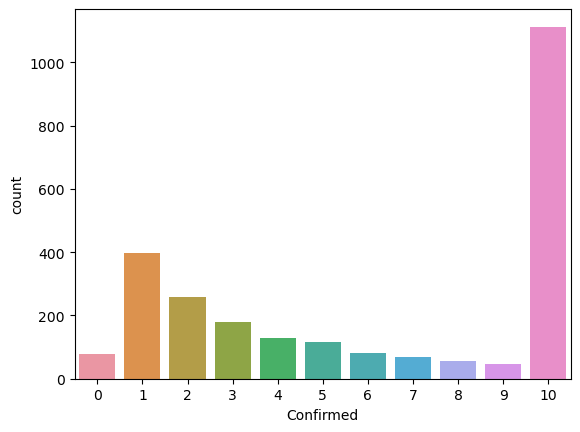

In [182]:
sns.countplot(data=df, x = 'Confirmed')
plt.show()